## OSM 2018 Homework 3

#### John Stachurski

In [3]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt


In [4]:
P = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.220, 0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.210, 0.194, 0.090, 0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.040, 0.009],
     [0.175, 0.178, 0.197, 0.207, 0.110, 0.067, 0.054, 0.012],
     [0.182, 0.184, 0.200, 0.205, 0.106, 0.062, 0.050, 0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.170, 0.143, 0.121, 0.028]]

The stationary distribution   [[0.20254451 0.20379879 0.20742102 0.19505842 0.09287832 0.0503871
  0.03932382 0.00858802]]


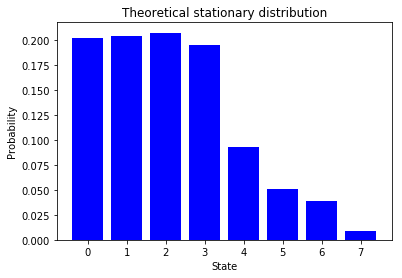

In [10]:
import quantecon as qe
mc=qe.MarkovChain(P)
print("The stationary distribution  ", mc.stationary_distributions)

plt.bar([0,1,2,3,4,5,6,7], mc.stationary_distributions[0], color = "blue")
plt.xlabel("State")
plt.ylabel("Probability")
plt.title("Theoretical stationary distribution")
plt.show()

### Exercise 2

This Markov chain is asymptotically stationary and ergodic, which means that, for any sample path $\{X_t\}$ generated according to $P$, we have

$$ \lim_{n \to \infty} \frac{1}{n} \sum_{t=1}^n \mathbb 1\{X_t = j\} = \psi(j) $$

where $\psi$ is the stationary distribution and $j$ is an integer between 0 and 7 (the set of possible states).

Use this fact to compute an approximation to the stationary distribution $\psi$.  Confirm visually that your result is similar to the stationary distribution you computed in exercise 1.

You can make use of the `simulate` method in `MarkovChain`.

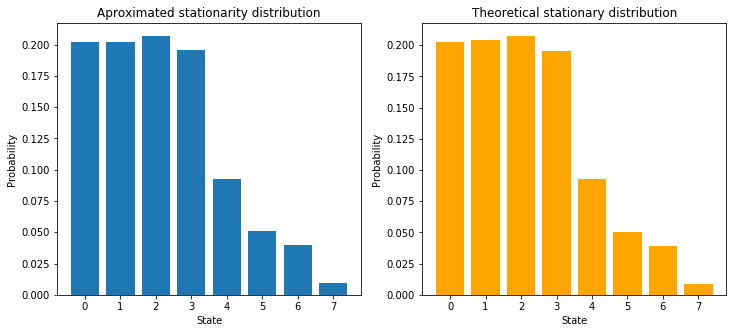

In [17]:
ts = 100000
path = mc.simulate(ts)
dist = np.zeros(8)
for i in range(8):
    dist[i] = len(path[path==i]) / float(ts)
    
plt.figure(figsize = [12, 5])
plt.subplot(1,2,1)
plt.bar([0,1,2,3,4,5,6,7], dist ,  label = "Aproximated stationarity distribution")
plt.xlabel("State")
plt.ylabel("Probability")
plt.title("Aproximated stationarity distribution")

plt.subplot(1,2,2)
plt.bar([0,1,2,3,4,5,6,7], mc.stationary_distributions[0] , color ="orange")
plt.xlabel("State")
plt.ylabel("Probability")
plt.title("Theoretical stationary distribution")

plt.show()

### Exercise 3

Ergodicity also implies that, if we simulate a large number of paths and then look at the cross section at some $T$, where $T$ is suitably large, then the empirical distribution should be close to the stationary distribution.

Confirm this by simulation and visual inspection, as above.

(In this context, the empirical distribution of a sample is the fraction of observations that take value $j$ for each $j$ in $0, \ldots, 7$.)

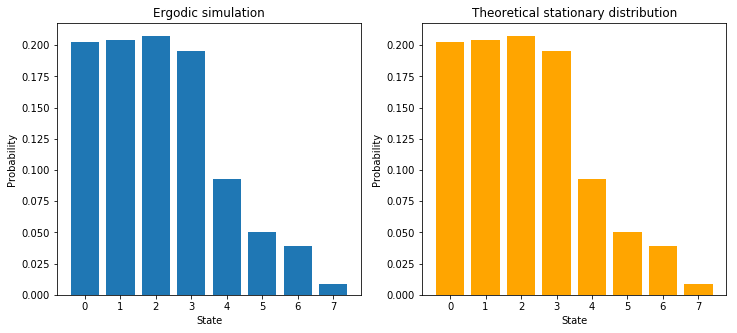

In [20]:
markov = np.array(P)
distri = np.array([1,0,0,0,0,0,0,0])
ts = 1000
for i in range(ts):
    distri = np.dot(distri, P)

plt.figure(figsize = [12, 5])
plt.subplot(1,2,1)
plt.bar([0,1,2,3,4,5,6,7], distri, label = "Simulation")
plt.xlabel("State")
plt.ylabel("Probability")
plt.title("Ergodic simulation")

plt.subplot(1,2,2)
plt.bar([0,1,2,3,4,5,6,7], mc.stationary_distributions[0] , color ="orange", label = "Truth")
plt.xlabel("State")
plt.ylabel("Probability")
plt.title("Theoretical stationary distribution")

plt.show()
